# JSON Exercises

## Imports

In [1]:
import numpy as np
import pandas as pd
from altair import *

## Using JSON to find your location

In this exercises you will make an HTTP request to a service that returns your location as JSON data by looking at your IP address.

1. Read the documentation of the Python `requests` library [here](http://docs.python-requests.org/en/latest/) to learn how to make an HTTP `GET` request. A `GET` request is the most basic way of downloading something from the web. Your web browser does this everytime you visit a page.
2. Find the right URL to make a JSON GeoIP request from this service: https://freegeoip.net
3. Make the request using `request.get`, and parse the `.text` attribute of the response using `json.loads`.
4. Write a function, `find_location` that takes a hostname (such as `google.com`) and returns a tuple of the lattitude and longitude.

In [2]:
import requests
import json

In [3]:
def find_location(host):
    """Find the (lat, lon) given hostname (google.com) using a GeoIP service."""
    loc = requests.get("https://freegeoip.net/json/" + host)
    data = json.loads(loc.text)
    lat = data['latitude']
    lon = data['longitude'] 
    return lat, lon

In [4]:
lat, lon = find_location('google.com')
print(lat)
print(lon)

37.4192
-122.0574


In [5]:
assert find_location('calpoly.edu')==(35.3471, -120.4553)
assert find_location('github.com')==(37.7697, -122.3933)

## California home prices using Quandl

The website http://quandl.com is an absolutely spectacular source of open data. It provides millions of data sets, on a wide range of topics in a range of formats (CSV, JSON, Excel). For the purpose of this exercise you are going to learn how to search Quandl for a data set and then load that data set into a `DataFrame` using `requests`.

1. Find a dataset of the rental prices (all homes) in the city of San Luis Obispo. You will need to create a Quandl account (you can use your GitHub credentials). This data is part of the Zillow dataset on Quandl.
2. Click on the JSON button and copy the URL that is shown into a Python variable named `url`.
3. Make an HTTP `GET` request to that URL using `requests`.
4. Parse the resulting JSON data and look at it.
5. Create a `DataFrame` with the `Date` and `Value` columns from the JSON data.
6. Save the `DataFrame` in the variable `data`.

In [6]:
#pd.DataFrame?

In [7]:
url = 'https://www.quandl.com/api/v3/datasets/ZILL/C00540_RAH.json?api_key=BXk9dX6vzLtQ2JBzTCcB'
urlResp = requests.get(url)
urlDict = urlResp.json()
dataset = urlDict['dataset']
data = pd.DataFrame(dataset['data'], columns=['Date', 'Value'])
data.head()

,Date,Value
0,2015-09-30,2494.0
1,2015-08-31,2535.0
2,2015-07-31,2522.0
3,2015-06-30,2503.0
4,2015-05-31,2504.0


In [8]:
assert url.startswith('https://www.quandl.com/api/v3/datasets/ZILL')
assert isinstance(data, pd.DataFrame)
assert list(data.columns)==['Date', 'Value']
assert len(data)>50

Create an Altair line chart that shows how rental prices are changing over time (over years and months):

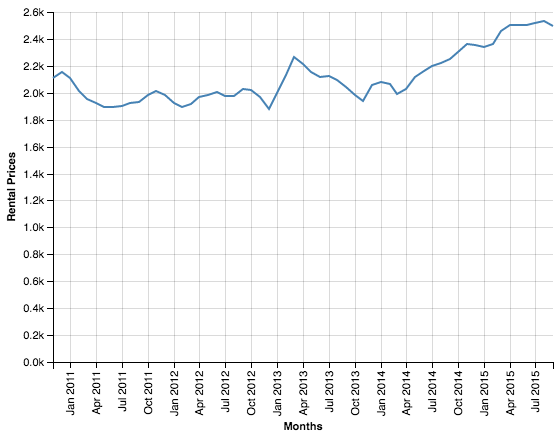

In [9]:
Chart(data).mark_line().encode(
    X('Date:T', title='Months', timeUnit='yearmonth', axis=Axis(ticks=10)),
    Y('Value:Q', title='Rental Prices')
)